# 1. 라이브러리 및 데이터 가져오기


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore') 

In [41]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
#데이터의 상위 5개를 출력
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
#데이터에 대한 기본정보를 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Survived : 0 = 사망, 1 = 생존
- Pclass : 1 = 1등석, 2 = 2등석, 3 = 3등석
- Sex : male = 남성, female = 여성
- Age : 나이
- SibSp : 타이타닉 호에 동승한 자매 / 배우자의 수
- Parch : 타이타닉 호에 동승한 부모 / 자식의 수
- Ticket : 티켓 번호
- Fare : 승객 요금
- Cabin : 방 호수
- Embarked : 탑승지, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴

In [43]:
#데이터 결측값 파악
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


- 객실과 나이,탑승지의 데이터에 결측값이 있다는 것을 알 수 있음

# 2. 데이터 시각화를 통한 생존율 확인 

In [44]:
#생존자와 사망자 인원 확인 
train["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

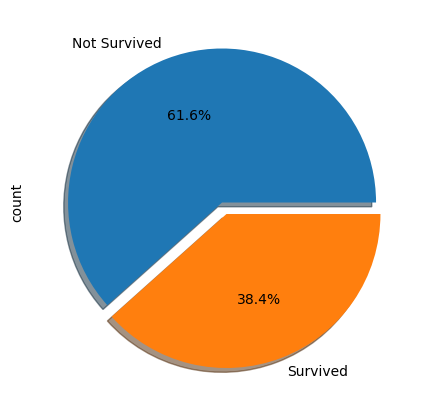

In [45]:
# 생존자와 사망자 비율 확인
plt.figure(figsize=(8,5))
labels = ['Not Survived','Survived']
train['Survived'].value_counts().plot.pie(explode=[0, 0.08], shadow=True, autopct='%1.1f%%',labels=labels)

In [46]:
#class(n등석)별 생존율
train[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


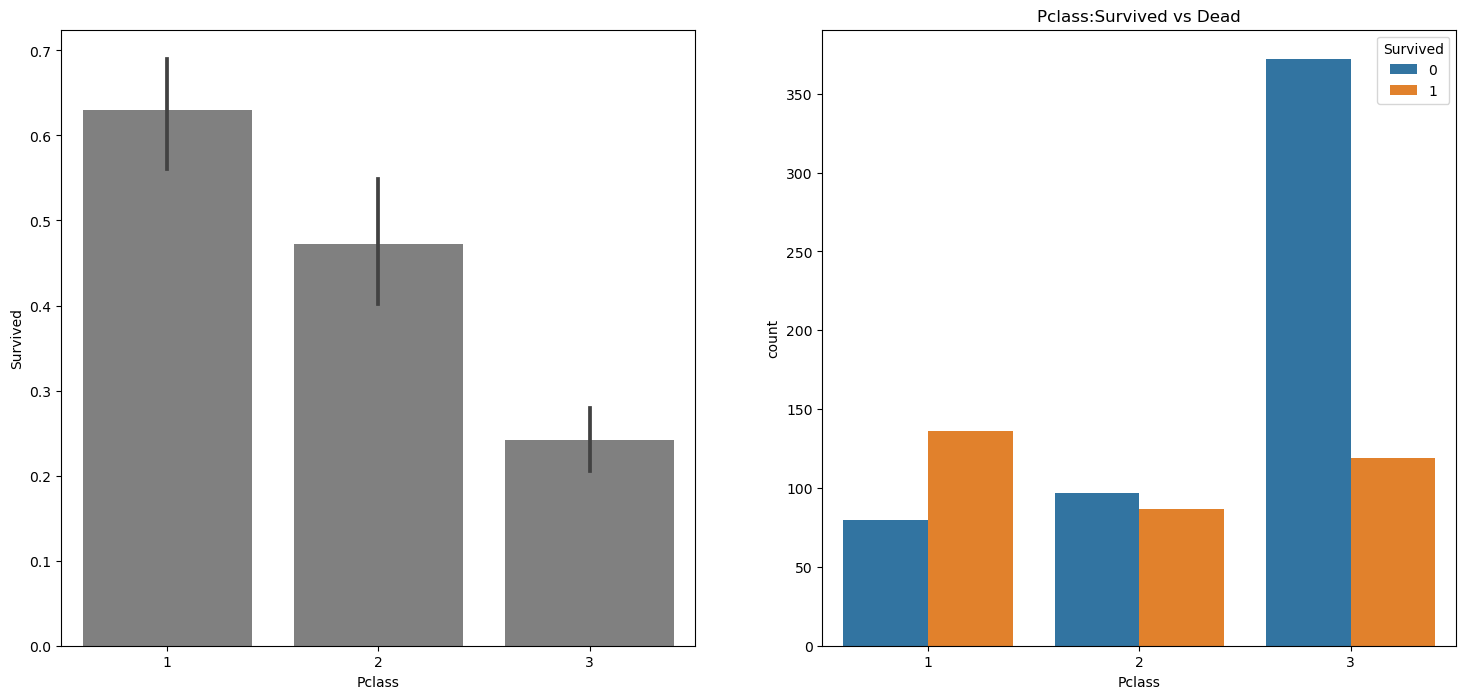

In [47]:
#class(n등석)별 생존율
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.barplot(x = "Pclass", y = "Survived",data = train,color = 'gray',ax=ax[0])
sns.countplot(x ='Pclass', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- 1등석이 가장 높은 생존률을 보이고 3등석이 가장 낮은 생존률을 보인다.
- 티켓 클래스는 생존 여부에 영향을 끼친다.

In [48]:
#Sex(성별)별 생존율
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


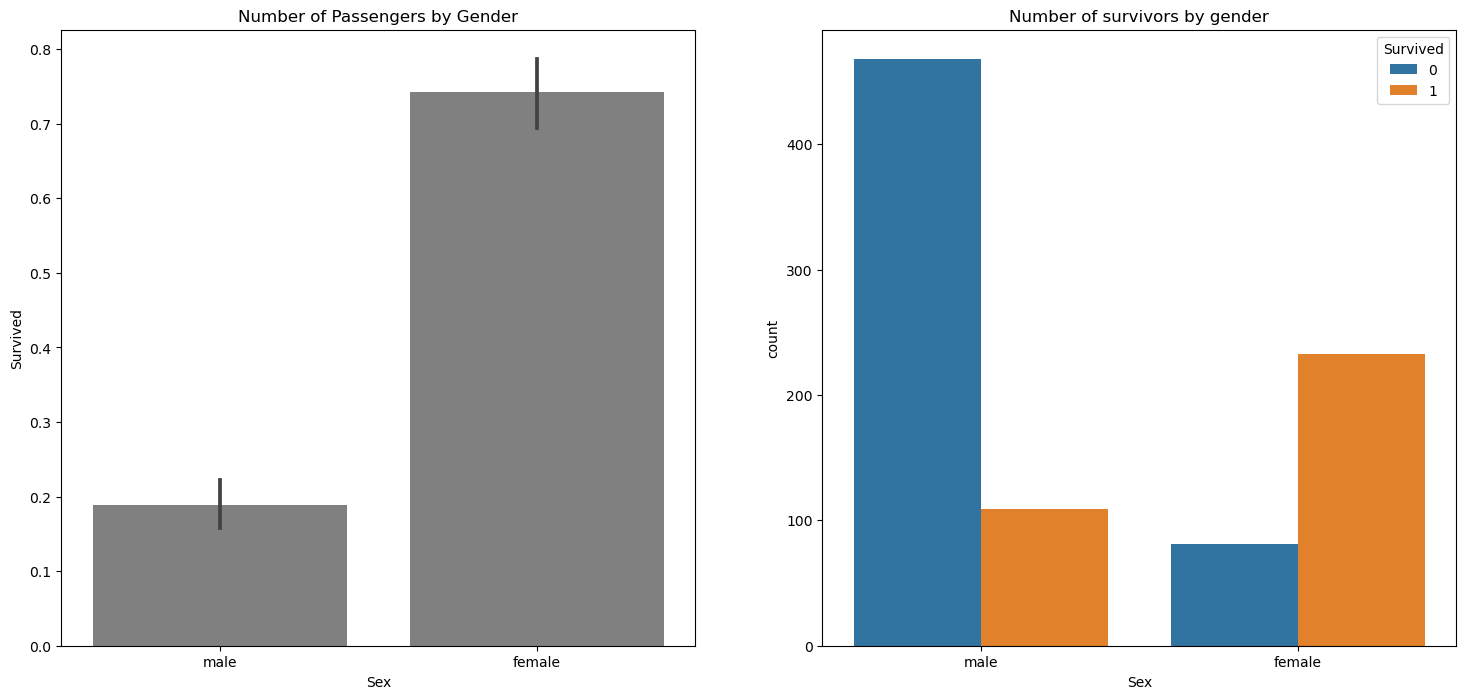

In [49]:
#Sex(성별)별 생존율

fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.barplot(x = "Sex", y = "Survived",data = train,color = 'gray',ax=ax[0])
ax[0].set_title('Number of Passengers by Gender')
sns.countplot(x ='Sex', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Number of survivors by gender')
plt.show()

In [50]:
#Embarked Analysis(승선장소)별 생존율
train[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


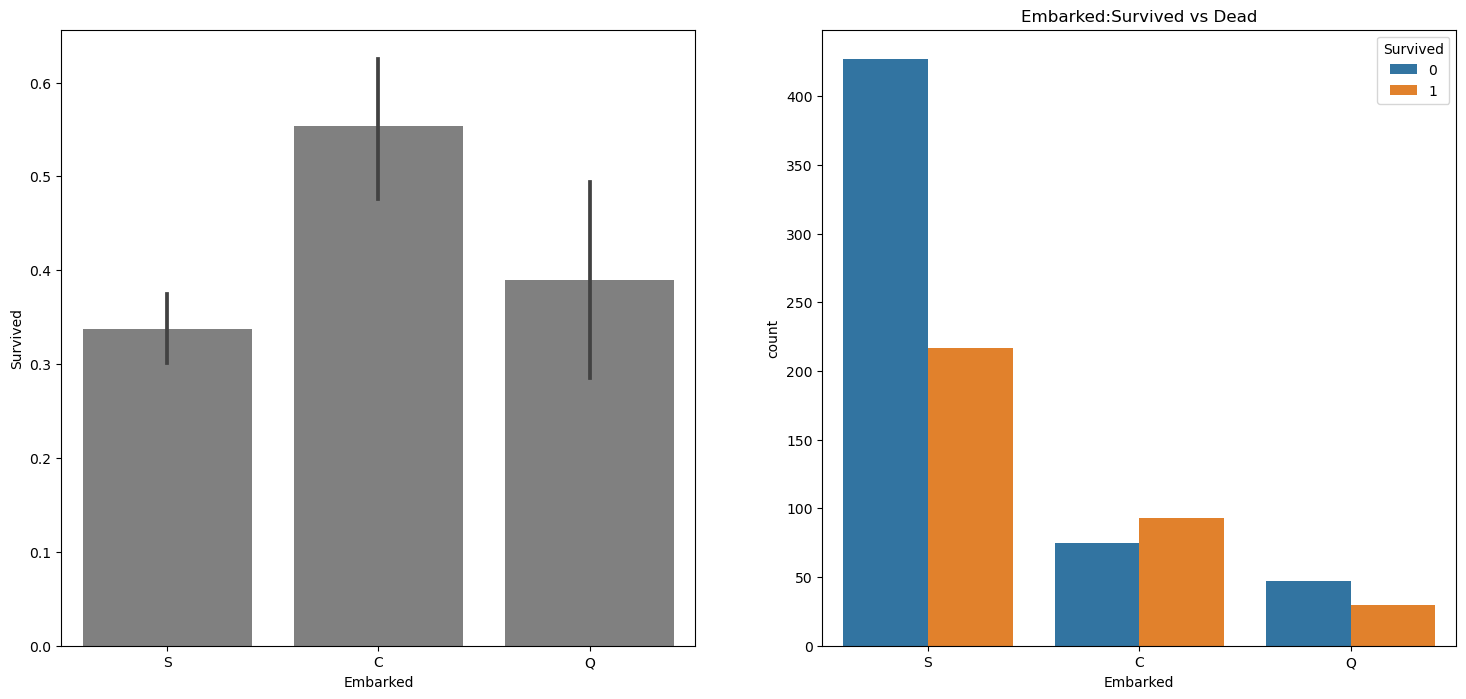

In [51]:
#Embarked Analysis(승선장소)별 생존율
fig, ax = plt.subplots(1, 2, figsize=(18,8))
sns.barplot(x = "Embarked", y = "Survived",data = train,color = 'gray',ax=ax[0])
sns.countplot(x ='Embarked', hue='Survived', data=train, ax=ax[1])
ax[1].set_title('Embarked:Survived vs Dead')
plt.show()

In [52]:
#Fare (승객 요금)별 생존율
train[['Fare','Survived']].groupby('Fare').mean()

,Survived
Fare,
0.0000,0.066667
4.0125,0.000000
5.0000,0.000000
6.2375,0.000000
6.4375,0.000000
...,...
227.5250,0.750000
247.5208,0.500000
262.3750,1.000000


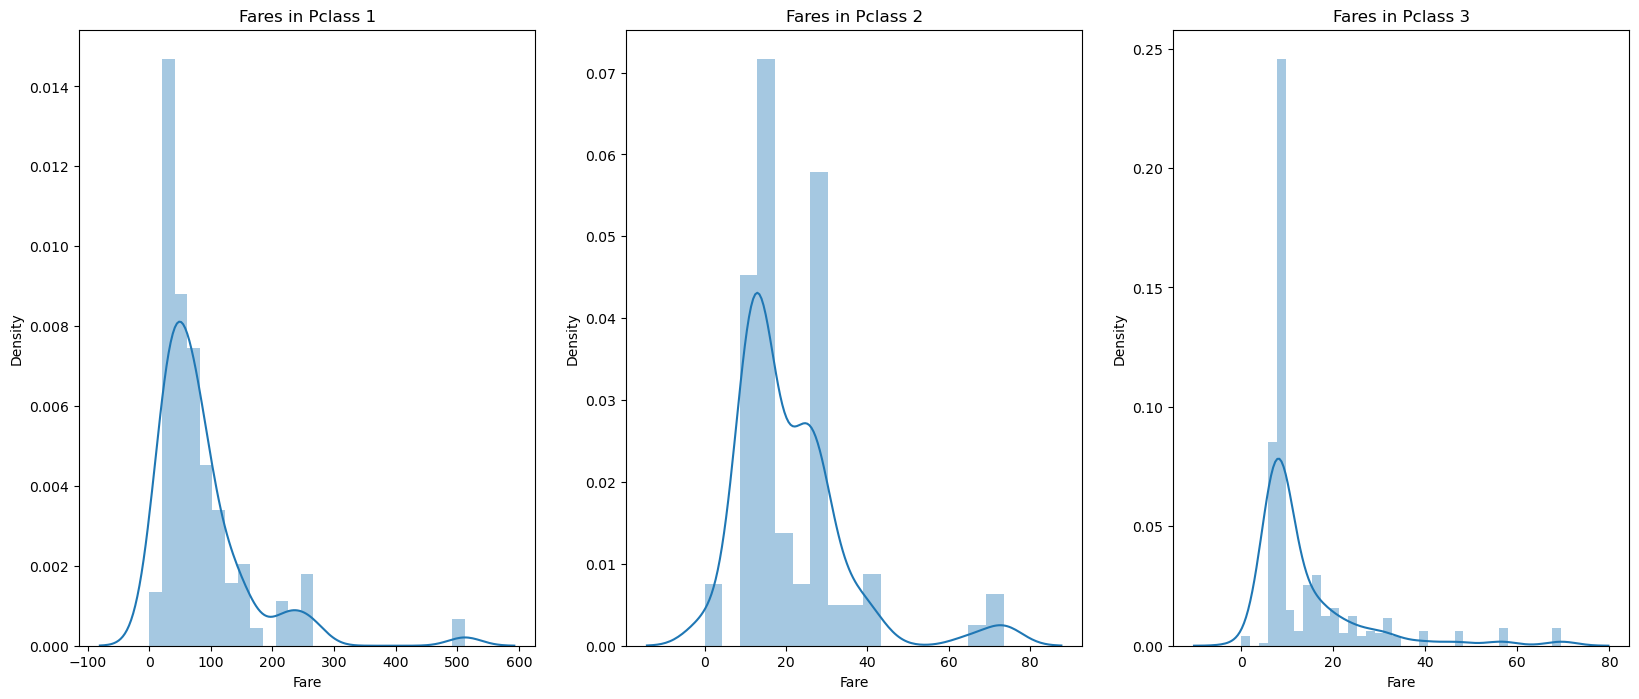

In [53]:
#각 Pclass에 따른 Fare(승객 요금)의 분포
fig, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.distplot(train[train['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

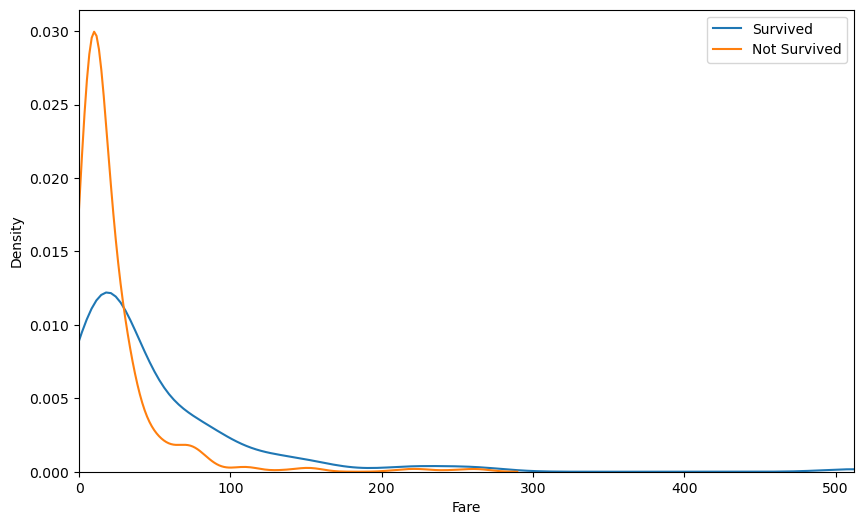

In [54]:
#Fare(승객 요금)에 따른 생존율
fig, ax = plt.subplots(figsize=(10,6))
sns.kdeplot(train[train['Survived']==1]['Fare'], ax=ax)
sns.kdeplot(train[train['Survived']==0]['Fare'], ax=ax)
ax.set(xlim=(0, train['Fare'].max()))
ax.legend(['Survived', 'Not Survived'])
 
plt.show()

In [55]:
# 나이(Age)별 생존율
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

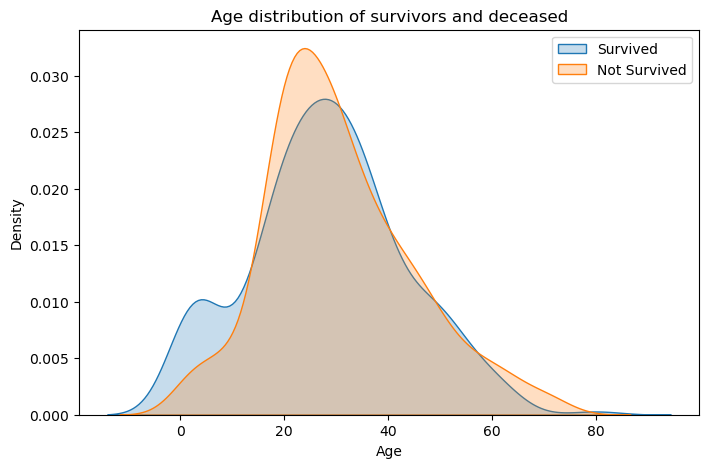

In [56]:
#나이별 생존율
sur = train[train['Survived'] == 1]
dead = train[train['Survived'] == 0]

plt.figure(figsize=(8, 5))
sns.kdeplot(sur['Age'], label='Survived', shade=True)
sns.kdeplot(dead['Age'], label='Not Survived', shade=True)

plt.title('Age distribution of survivors and deceased')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.show()

In [57]:
# SibSp(동승 자매/배우자)별 생존율
train[['SibSp','Survived']].groupby('SibSp').mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


<Axes: xlabel='SibSp', ylabel='Survived'>

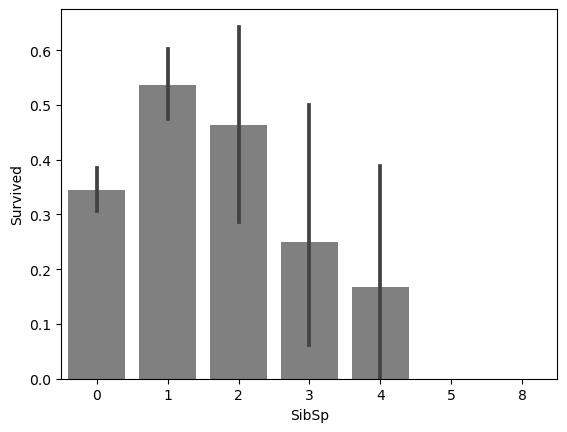

In [58]:
# SibSp(동승 자매/배우자)별 생존율
sns.barplot(x = "SibSp", y = "Survived",data = train,color = "gray")

In [59]:
# Parch(동승 부모/자식)별 생존율
train[['Parch','Survived']].groupby('Parch').mean()

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


<Axes: xlabel='Parch', ylabel='Survived'>

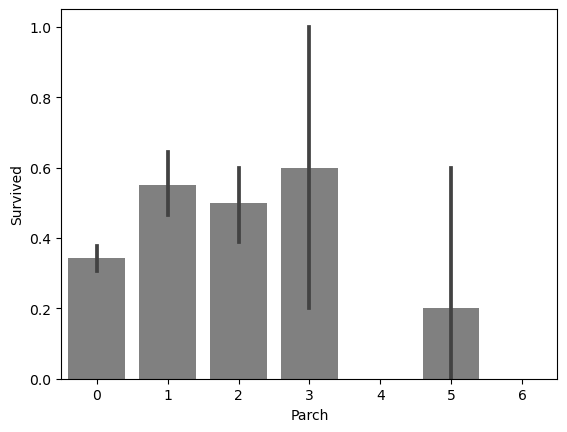

In [60]:
# Parch(동승 부모/자식)별 생존율
sns.barplot(x = "Parch", y = "Survived",data = train,color = "gray")

# 데이터 시각화 결과 : 생존자와 사망자의 비율확인
- class(n등석)별 생존율
: 1등석이 가장 높은 생존률을 보이고 3등석이 가장 낮은 생존율을 보인다.
티켓 클래스는 생존 여부에 영향을 끼친다.
- Sex(성별)별 생존율
: 여성의 생존율이 남성보다 높게 나타나는 것을 보아 여성을 우선적으로 구했다는 것을 알 수 있다.
- Embarked Analysis(승선장소)별 생존율
: S항에서 탑승한 사람이 가장 많고, 사망자 역시 S항 탑승자가 많다.
- SibSp(동승 자매/배우자)별 생존율
: 동승 자매/배우자가 3-4명 이상인 경우 사망율이 높다.
- Parch(동승 부모/자식)별 생존율
: 동승 부모/자식이 3-4명 이상인 경우 사망율이 높다.
- Fare (승객 요금)별 생존율
: 1등석은 70-100정도의 요금을 내고, 많게는 500,600까짇 지불하였고
2등석은 10-20사이의 요금을 지불하였으며 3등석은 10정도의 요금을 지불하였다는 것을 알 수 있다.
탑승 금액이 적은 쪽에서 사망율이 높다. 
- 나이(Age)별 생존율
: 어린나이의 탐승객들의 생존율이 비교적 높고, 
20-30세의 생존율은 비교적 낮다. 

# 2-1. 특징공합으로 기존의 변수를 활용해 새로운 변수 생성하기 
- SibSp와 Parch는 모두 동승자의 항목이고, 그 결과가 비슷하기 때문에 동승자라는 새로운 항목으로 병합하였다.

In [61]:
train['Fellow passenger'] = train['SibSp'] + train['Parch'] + 1
test['Fellow passenger'] = train['SibSp'] + train['Parch'] + 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fellow passenger
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


<Axes: xlabel='Fellow passenger', ylabel='count'>

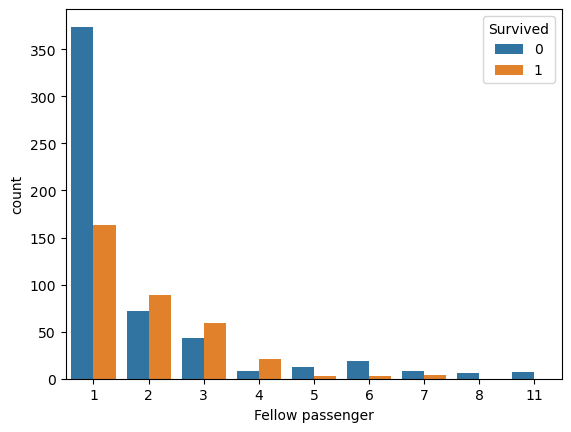

In [62]:
pd.pivot_table(train, index='Fellow passenger', values='Survived')
sns.countplot(data=train, x='Fellow passenger', hue='Survived')

# 3-1.train set의 데이터 전처리

In [63]:
#train 데이터 set 결측값 파악
print(train.isnull().sum())

PassengerId           0
Survived              0
Pclass                0
Name                  0
Sex                   0
Age                 177
SibSp                 0
Parch                 0
Ticket                0
Fare                  0
Cabin               687
Embarked              2
Fellow passenger      0
dtype: int64


train data set의 결측값
- Age
: Pclass별 평균값을 통해 대체
- cabin
: 결측값이 너무 많아 삭제
- Embarked
: 최빈값인 S값으로 대체


필요없는 데이터 항목 삭제
- cabin
- Ticket
- passengerld
- Name
- Fellow passenger항목으로 병합한 SibSp와 Parch 

In [64]:
#Embarked Analysis(승선장소)
# 최빈 값인 'S'값으로 대체
train['Embarked'] = train['Embarked'].fillna('S')
train['Embarked'].isnull().sum()

0

In [65]:
# Age(나이)의 결측값을 Pclass별 평균 값으로 대체
train['Age'] = train['Age'].fillna(train.groupby('Pclass')['Age'].transform('mean'))
print(train['Age'].isnull().sum())

0


In [66]:
#필요없는 데이터 항목 삭제, 칼럼 삭제 확인 
train = train.drop(['PassengerId', 'Ticket', 'Cabin','Name','SibSp','Parch'], axis = 1)
print(train.isnull().sum())

Survived            0
Pclass              0
Sex                 0
Age                 0
Fare                0
Embarked            0
Fellow passenger    0
dtype: int64


# 3-2.test set의 데이터 전처리

In [67]:
#test 데이터 결측값 파악
print(test.isnull().sum())

PassengerId           0
Pclass                0
Name                  0
Sex                   0
Age                  86
SibSp                 0
Parch                 0
Ticket                0
Fare                  1
Cabin               327
Embarked              0
Fellow passenger      0
dtype: int64


test data set의 결측값
- Age
: Pclass별 평균값을 통해 대체
- cabin
: 결측값이 너무 많아 삭제
- Fare
: Fare 평균으로 대체 

필요없는 데이터 항목 삭제
- cabin
- Ticket
- passengerld
- Name
- Fellow passenger항목으로 병합한 SibSp와 Parch 

In [68]:
#Fare(승객요금) 평균값으로 대체
test.loc[test['Pclass'] == 3, ['Fare']] = test[test['Pclass'] == 3]['Fare'].fillna(12.46)
train['Fare'].isnull().sum()

0

In [69]:
# Age(나이)의 결측값을 Pclass별 평균 값으로 대체
test['Age'] = test['Age'].fillna(test.groupby('Pclass')['Age'].transform('mean'))
print(test['Age'].isnull().sum())

0


In [70]:
#필요없는 데이터 항목 삭제, 칼럼 삭제 확인 
test = test.drop(['PassengerId', 'Ticket', 'Cabin','Name','SibSp','Parch'], axis = 1)
print(test.isnull().sum())

Pclass              0
Sex                 0
Age                 0
Fare                0
Embarked            0
Fellow passenger    0
dtype: int64


In [71]:
train.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Fellow passenger
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1


# 3-3. 데이터 변환

In [72]:
# train,test데이터의 Sex를 0과 1로 변경
train['Sex'] = train['Sex'].astype('category').cat.codes
test['Sex'] = test['Sex'].astype('category').cat.codes
train.head(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,Fellow passenger
0,0,3,1,22.0,7.2500,S,2
1,1,1,0,38.0,71.2833,C,2
2,1,3,0,26.0,7.9250,S,1
3,1,1,0,35.0,53.1000,S,2
4,0,3,1,35.0,8.0500,S,1


In [73]:
#test.head(5)

In [74]:
data_list = [train, test]

# Embarked 열의 S, Q, C를 0, 1, 2의 값으로 변경
for data in data_list:
    data['Embarked'] = data['Embarked'].map({'S': 0, 'Q': 1, 'C': 2})

test.head(5)

,Pclass,Sex,Age,Fare,Embarked,Fellow passenger
0,3,1,34.5,7.8292,1,2
1,3,0,47.0,7.0000,0,2
2,2,1,62.0,9.6875,1,1
3,3,1,27.0,8.6625,0,2
4,3,0,22.0,12.2875,0,1


In [75]:
# Age 값을 5개의 범위로 나누어 0, 1, 2, 3, 4, 5로 변경하고 새로운 열에 저장
for data in data_list:
    data['Age'] = pd.cut(data['Age'], bins=5, labels=[0, 1, 2, 3, 4])
    
test.head(10)

,Pclass,Sex,Age,Fare,Embarked,Fellow passenger
0,3,1,2,7.8292,1,2
1,3,0,3,7.0000,0,2
2,2,1,4,9.6875,1,1
3,3,1,1,8.6625,0,2
4,3,0,1,12.2875,0,1
5,3,1,0,9.2250,0,1
6,3,0,1,7.6292,1,1
7,2,1,1,29.0000,0,5
8,3,0,1,7.2292,2,3
9,3,1,1,24.1500,0,2


In [76]:
for data in data_list:
    data['Fare'] = pd.cut(data['Fare'], bins=4, labels=[0, 1, 2, 3])

test.head(5)

,Pclass,Sex,Age,Fare,Embarked,Fellow passenger
0,3,1,2,0,1,2
1,3,0,3,0,0,2
2,2,1,4,0,1,1
3,3,1,1,0,0,2
4,3,0,1,0,0,1


# 4.  모델 선택과 훈련